In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting
%matplotlib inline


### **Task 1: Load and Explore the Dataset**

In [2]:
# Load the dataset
file_path = "AirQualityUCI.csv"
df = pd.read_csv(file_path, sep=';', decimal=',')

# Display the first few rows
df.head()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [3]:
# Check structure: datatypes and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB


In [4]:
# Remove empty unnamed columns that might exist
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Replace missing values encoded as -200 with NaN
df.replace(-200, pd.NA, inplace=True)

# Count missing values per column
df.isna().sum()


Date              114
Time              114
CO(GT)           1797
PT08.S1(CO)       480
NMHC(GT)         8557
C6H6(GT)          480
PT08.S2(NMHC)     480
NOx(GT)          1753
PT08.S3(NOx)      480
NO2(GT)          1756
PT08.S4(NO2)      480
PT08.S5(O3)       480
T                 480
RH                480
AH                480
dtype: int64

In [5]:
# Drop rows with too many NaNs OR fill them (we'll drop for simplicity)
df_clean = df.dropna()

# Confirm no missing values
df_clean.isna().sum()


Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

### **Task 2: Basic Data Analysis**

In [6]:
# Compute statistics
df_clean.describe()


,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,827,827,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0,827.0000
unique,44,23,71.0,536.0,423.0,257.0,569.0,293.0,554.0,149.0,576.0,658.0,197.0,440.0,767.0000
top,10/04/2004,18.00.00,1.9,1207.0,66.0,8.6,880.0,61.0,1098.0,114.0,1527.0,733.0,14.8,36.7,0.8771
freq,23,38,31.0,7.0,11.0,10.0,5.0,9.0,5.0,16.0,5.0,5.0,14.0,7.0,3.0000


In [7]:
# Group by a categorical column: 'Month' and get average NO2 levels
df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
df_clean['Month'] = df_clean['Date'].dt.month

monthly_avg_no2 = df_clean.groupby('Month')['NO2(GT)'].mean()
monthly_avg_no2


/tmp/ipykernel_436/3941670940.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Date'] = pd.to_datetime(df_clean['Date'], errors='coerce')
/tmp/ipykernel_436/3941670940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Month'] = df_clean['Date'].dt.month


Month
1.0       99.47619
2.0     121.545455
3.0      86.333333
5.0     107.928571
6.0      96.043478
7.0       85.26087
8.0     108.238095
9.0           95.0
10.0     94.413793
11.0     85.772727
12.0     91.977273
Name: NO2(GT), dtype: object

In [8]:
# Observations
print("Observation:")
print("→ NO2 levels vary across months, possibly influenced by seasonal activities like traffic or heating.")


Observation:
→ NO2 levels vary across months, possibly influenced by seasonal activities like traffic or heating.


### **Task 3: Data Visualization**

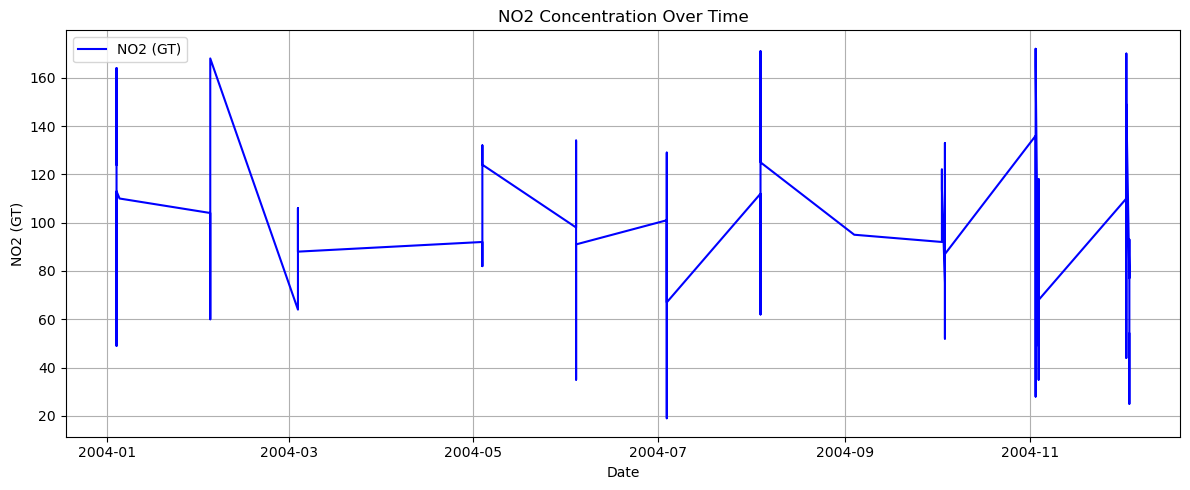

In [9]:
# 1. Line Chart - NO2 Trends Over Time
# Sort by date and plot NO2 over time
df_clean_sorted = df_clean.sort_values('Date')
plt.figure(figsize=(12,5))
plt.plot(df_clean_sorted['Date'], df_clean_sorted['NO2(GT)'], label='NO2 (GT)', color='blue')
plt.title("NO2 Concentration Over Time")
plt.xlabel("Date")
plt.ylabel("NO2 (GT)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


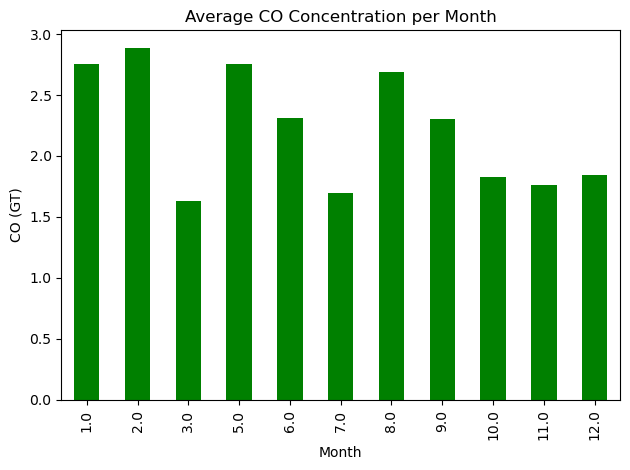

In [10]:
# Bar Chart - Average CO Per Month
monthly_avg_co = df_clean.groupby('Month')['CO(GT)'].mean()
monthly_avg_co.plot(kind='bar', color='green')
plt.title("Average CO Concentration per Month")
plt.xlabel("Month")
plt.ylabel("CO (GT)")
plt.tight_layout()
plt.show()


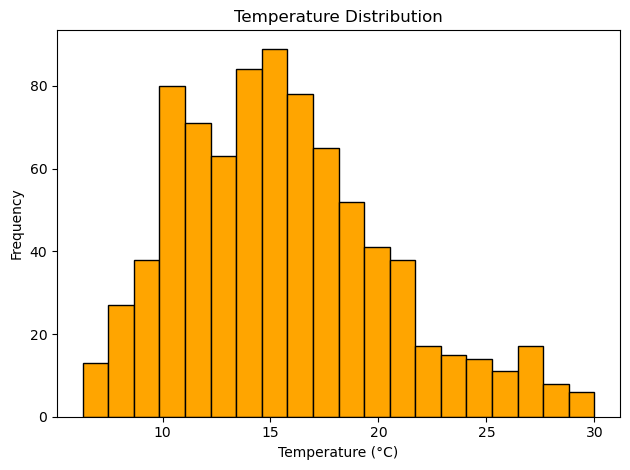

In [11]:
# 3. Histogram - Distribution of Temperature
plt.hist(df_clean['T'], bins=20, color='orange', edgecolor='black')
plt.title("Temperature Distribution")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


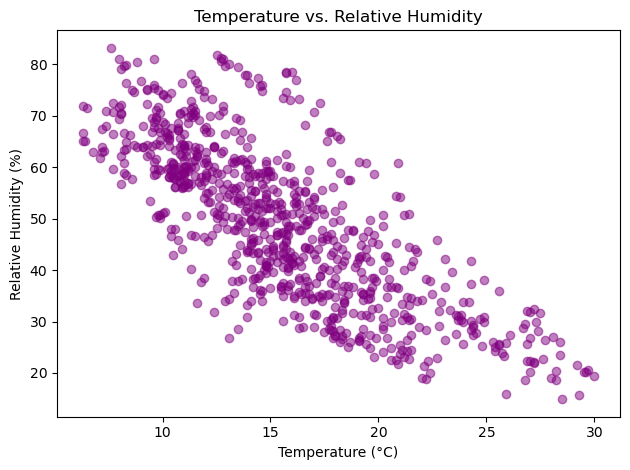

In [12]:
# 4. Scatter Plot - Temperature vs. RH (Relative Humidity)
plt.scatter(df_clean['T'], df_clean['RH'], alpha=0.5, color='purple')
plt.title("Temperature vs. Relative Humidity")
plt.xlabel("Temperature (°C)")
plt.ylabel("Relative Humidity (%)")
plt.tight_layout()
plt.show()
